## _Topic Modeling based on Reviews_
***
<b>DESCRIPTION</b>

You are asked to analyze customer reviews from an e-commerce platform. More specifically, you will perform topic modeling to identify common themes in the reviews, apply POS tagging to extract grammatical information and utilize lemmatization to normalize the words for better
analysis.

<b>Problem Statement: </b>

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

<b>Domain: Amazon reviews for a leading phone brand</b>

- Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

<b> Content: </b>

- Dataset: ‘K8 Reviews v0.2.csv’

<b>Columns:</b>
- Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
- Reviews: The main text of the review

<b>Steps to perform:</b>

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.
Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. 

<b>Tasks: </b>
- Read the .csv file using Pandas. Take a look at the top few records.
- Normalize casings for the review text and extract the text into a list for easier manipulation.
- Tokenize the reviews using NLTKs word_tokenize function.
- Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
- For the topic model, we should  want to include only nouns.
- Find out all the POS tags that correspond to nouns.
- Limit the data to only terms with these tags.
- Lemmatize. 
- Different forms of the terms need to be treated as one.
- No need to provide POS tag to lemmatizer for now.
- Remove stopwords and punctuation (if there are any). 
- Create a topic model using LDA on the cleaned up data with 12 topics.
- Print out the top terms for each topic.
- What is the coherence of the model with the c_v metric?
- Analyze the topics through the business lens.
- Determine which of the topics can be combined.
- Create topic model using LDA with what you think is the optimal number of topics
- What is the coherence of the model?
- Create a table with the topic name and the top 10 terms in each to present to the  business.



In [2]:
import nltk
# write the list of necessary packages here:
!pip install pandas
!pip install nltk
!pip install spacy
!pip install scikit-learn
!pip install gensim
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
  Using cached numpy-2.0.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-2.0.2-cp310-cp310-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[

## _Import Libraries and Load the Data_

In [62]:
# import your packages here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
from gensim.models import CoherenceModel




[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ceskici/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ceskici/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/ceskici/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ceskici/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### _Load the Reviews Data_

In [63]:
reviews = pd.read_csv('K8 Reviews v0.2.csv',delimiter=',')
reviews.head(3)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...


In [6]:
#check the number of reviews 
len(reviews)

14675

In [7]:
#check the basic info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


- _There are no null values or missing values in the dataset_

In [8]:
#check the sentiment labels
reviews['sentiment'].value_counts()

sentiment
0    7712
1    6963
Name: count, dtype: int64

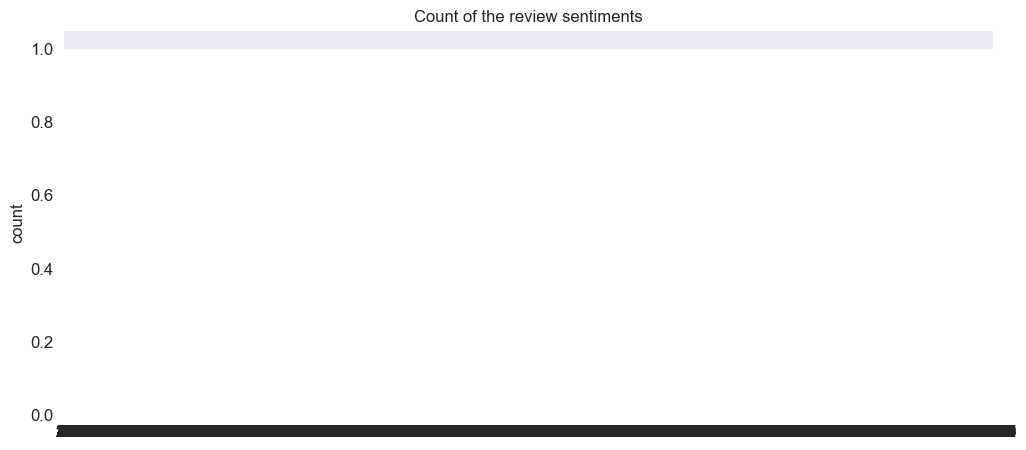

In [11]:
sns.countplot(reviews['sentiment'])
plt.title('Count of the review sentiments')
plt.show()

- _The data seems to be fairly balanced. However, the objective of this project is to do topic modeling and not sentiment classification_

## _Text Preprocessing_
_Following steps will be performed_
- Tokenization - Split the text into sentences and sentences into words. Lowercase the words and remove any punctuation_
- All stopwords will be removed_
- Eliminate the tokens except nouns, noun phrases and verbs.
- Words are lemmatized - words in third person are changed to first person and words in future and past tense are changed to present tense_

In [64]:
def preprocessing(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords.words('english')] 
    
    # pos tagging
    pos_tags = nltk.tag.pos_tag(tokens)
    pos_tags = [token for token, tag in pos_tags if tag.startswith('N') or tag.startswith('V')]
    tokens = [WordNetLemmatizer().lemmatize(token) for token in pos_tags]
    return tokens
    # return  " ".join(tokens)


In [65]:
reviews['preprocessed_text'] = reviews['review'].apply(preprocessing)

In [66]:
print(reviews['preprocessed_text'])

0                              [need, update, improvement]
1        [mobile, bought, draining, hell, backup, hour,...
2                                              [get, cash]
3                                                       []
4        [phone, everthey, changed, phone, problem, ama...
                               ...                        
14670     [phone, everything, working, whater, use, phone]
14671    [note, take, picture, camera, slim, body, bit,...
14672                                       [gaget, price]
14673                     [phone, processing, camera, mod]
14674                                  [product, pakeging]
Name: preprocessed_text, Length: 14675, dtype: object


### Topic Modeling

Implement topic modeling using Latent Dirichlet Allocation (LDA) which is a topic modeling technique for uncovering the central topics and their distributions across a set of documents. Identify and list the top 5 topics found in the reviews along with their associated keywords.

In [67]:
tokenized = [text for text in reviews['preprocessed_text']]

bigram = Phrases(tokenized, min_count=3)
for idx in range(len(tokenized)):
    for token in bigram[tokenized[idx]]:
        if '_' in token:
            tokenized[idx].append(token)
            
dictionary = Dictionary(tokenized)
dictionary.filter_extremes(no_below=1, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in tokenized]

In [68]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=50)

umass_model = CoherenceModel(model=lda_model, texts=tokenized, dictionary=dictionary, coherence='u_mass')
umass_score = umass_model.get_coherence()

cv_model = CoherenceModel(model=lda_model, texts=tokenized, dictionary=dictionary, coherence='c_v')
cv_score = cv_model.get_coherence()

print(f"u_mass Coherence Score:{umass_score}")
print(f"c_v Coherence Score:{cv_score}")
    
# perplexities = []
# for num_topics in range(2, 10):
#     model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
#     perplexity = model.log_perplexity(corpus)
#     perplexities.append((num_topics, perplexity))
#     print(f"Num Topics: {num_topics}, Perplexity: {perplexity:.4f}")
# 
# x, y = zip(*perplexities)
# plt.plot(x, y, marker='o')
# plt.title("Perplexity vs. Number of Topics")
# plt.xlabel("Number of Topics")
# plt.ylabel("Perplexity")
# plt.show()


u_mass Coherence Score:-4.12065357344278
c_v Coherence Score:0.5892346355272278


In [70]:
topics = lda_model.print_topics(num_words=3)
topic_labels = {}
for idx, topic in enumerate(topics):
    top_words = topic[1]  
    label = " ".join([word.split('*')[1].strip().replace('"', '') for word in top_words.split(' + ')])
    topic_labels[idx] = label


def get_dominant(lda_mdl, crps):
    dominant_topics = []
    for cps in crps:
        tpc = lda_mdl.get_document_topics(cps, minimum_probability=0.0)
        dominant_topic = max(tpc, key=lambda x: x[1])
        dominant_label = topic_labels.get(dominant_topic[0])
        dominant_topics.append(dominant_label)
    return dominant_topics

reviews['dominant_topic'] = get_dominant(lda_model, corpus)


print(reviews['dominant_topic'].value_counts())

for num, lbl in topic_labels.items():
    review = reviews[reviews['dominant_topic'] == lbl].iloc[0]['review']
    dom_topic = reviews[reviews['dominant_topic'] == lbl].iloc[0]['dominant_topic']
    print(f"Dominant topic: {dom_topic}")
    print(f"Review: {review}")
    print("-"*50)

    
        

dominant_topic
product phone buy         4660
camera battery quality    3342
phone battery heating     3159
phone price feature       2346
mobile waste hai          1168
Name: count, dtype: int64
Dominant topic: product phone buy
Review: Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.
--------------------------------------------------
Dominant topic: camera battery quality
Review: The battery level has worn down
--------------------------------------------------
Dominant topic: phone price feature
Review: when I will get my 10% cash back.... its already 15 January..

### Reporting

Summarizing the findings, including:
• How did you select the number of topics?
• Coherence score measures how semantically related the top words are in each topic.
Which coherence type did you employ (c v, u mass or uci)?
• The most common topics identified in the reviews.
• Print examples of reviews that belong to each topic.

For selecting the number of topics, I used perplexity. In the commented lines, there is a function for calculating perplexity and plotting the perplexity vs. number of topics. By using the elbow method, the ideal number of topics should be 3. After deciding on the number of words, the top five generated topic labels and their counts were as below:

product phone buy         4660
camera battery quality    3342
phone battery heating     3159
phone price feature       2346
mobile waste hai          1168

For evaluating, I chose c_v coherence score, since the main aim of this task was understanding and interpreting the topics. c_v coherence score is based on semantic similarity, and related with human interpretability. c_v coherence score turned out to be 0.5698530603330785, which meant that the topics are meaningful.
 I also calculated u_mass coherence score, and it came out negative (-3.84214794778534), meaning that the top words do not occur with each other in the same text. I preferred to choose c_v score over u_mass score because it gave more meaningful results for our main goal.
 
Some examples of reviews are as follows:

Dominant topic: product phone buy
Review: Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.

Dominant topic: camera battery quality
Review: The battery level has worn down

Dominant topic: phone price feature
Review: when I will get my 10% cash back.... its already 15 January..

Dominant topic: phone battery heating
Review: Good but need updates and improvements

Dominant topic: mobile waste hai
Review: Only I'm telling don't buyI'm totally disappointedPoor batteryPoor cameraWaste of money

### Visualization

Plot word clouds for each topic displaying associated keywords

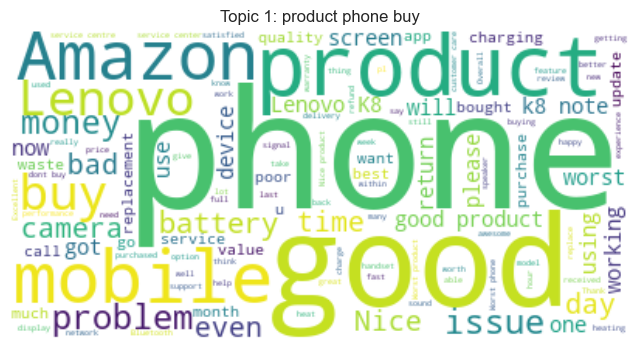

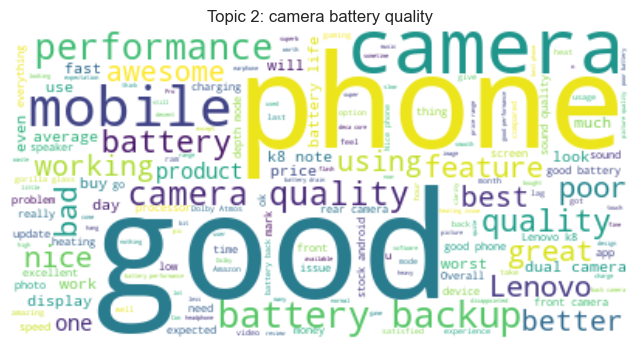

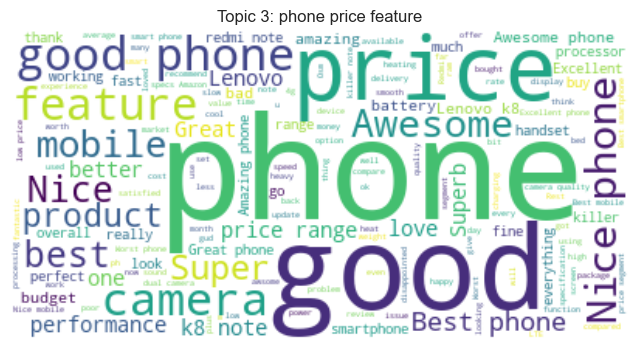

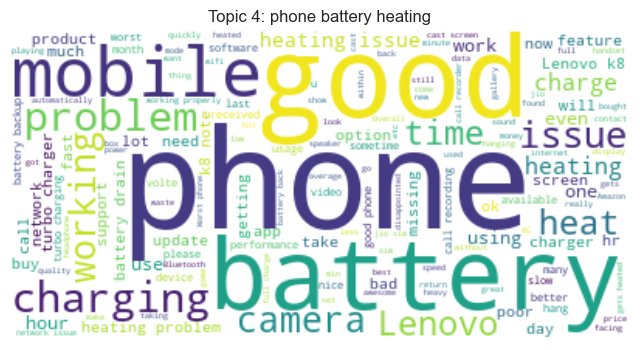

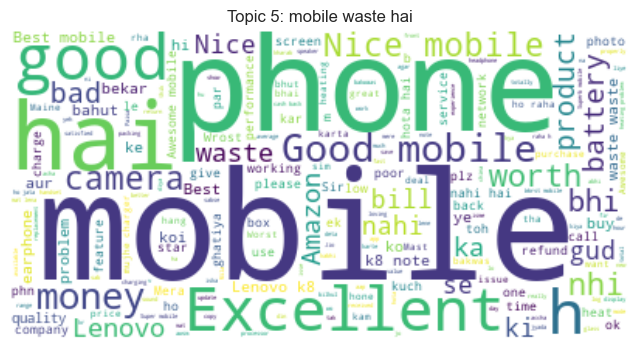

In [71]:
def word_clouds(words, topic_num):
    for topic_index in range(topic_num):
        topic_reviews = words[reviews['dominant_topic'] == topic_labels.get(topic_index)]['review']
        all_reviews_text = ' '.join(topic_reviews)
       
        wordcloud = WordCloud(background_color='white').generate(all_reviews_text)
        plt.figure(figsize=(8, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        topic_label = topic_labels.get(topic_index, f"Topic {topic_index}")
        plt.title(f"Topic {topic_index + 1}: {topic_label}")
        plt.show()


word_clouds(reviews, 5)